## Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Reading dataset

data = pd.read_csv('dataset.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### Q2. Split the dataset into a training set (70%) and a test set (30%).

In [6]:
X = data.drop('target',axis=1)
y = data.target

In [7]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [11]:
X_train.shape,X_test.shape

((212, 13), (91, 13))

##### Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rf_classifier = RandomForestClassifier(n_estimators=100,max_depth=10)

In [14]:
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [15]:
y_pred = rf_classifier.predict(X_test)

In [16]:
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1])

##### Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [17]:
from sklearn.metrics import accuracy_score, classification_report

In [18]:
print(accuracy_score(y_pred,y_test))

0.7912087912087912


In [19]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        42
           1       0.80      0.82      0.81        49

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



##### Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

In [20]:
 feature_importances = rf_classifier.feature_importances_

In [21]:
feature_importances

array([0.08214477, 0.03001143, 0.12891122, 0.07266252, 0.07209284,
       0.00899295, 0.0186399 , 0.09826118, 0.07894006, 0.09469976,
       0.04386164, 0.15924125, 0.11154047])

In [22]:
sorted_indices = np.argsort(feature_importances)[::-1]
top_5_indices = sorted_indices[:5]
top_5_features = [X.columns[i] for i in top_5_indices]
top_5_importances = [feature_importances[i] for i in top_5_indices]

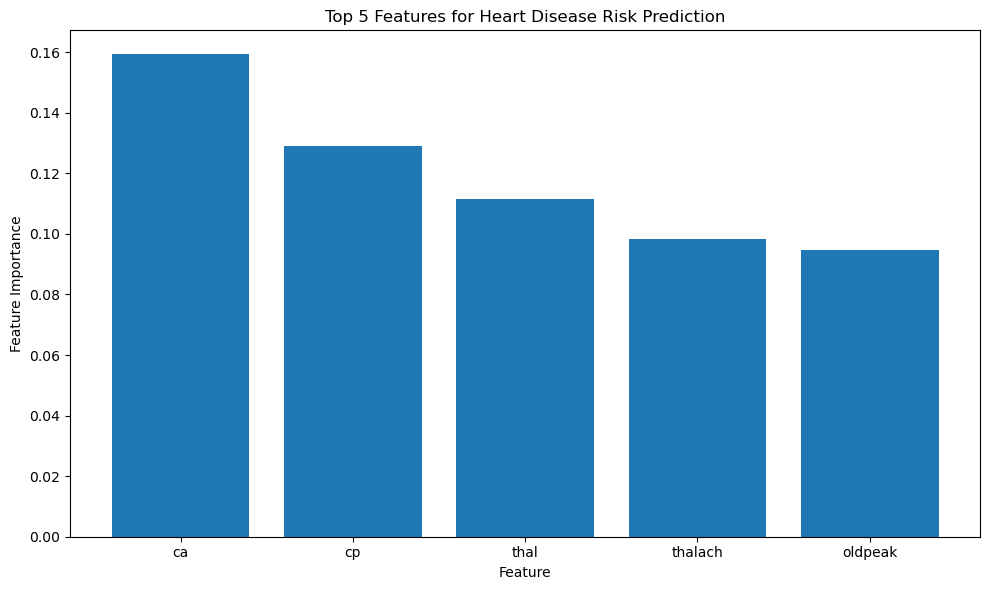

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(range(5), top_5_importances, tick_label=top_5_features)
plt.title("Top 5 Features for Heart Disease Risk Prediction")
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.tight_layout()
plt.show()

##### Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [29]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [59]:
param_grid = {
            'n_estimators' : [50,100,250,500],
            'max_depth' : [7,9,10],
            'min_samples_split':[1,2,3],
            'min_samples_leaf' : [1,2,3]                
}

In [60]:
grid = GridSearchCV(rf_classifier,param_grid=param_grid,refit=True,cv= 5,verbose=3)

In [61]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=0.930 total time=   0.1s
[CV 2/5] END max_depth=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=0.837 total time=   0.1s
[CV 3/5] END max_depth=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=0.762 total time=   0.1s
[CV 4/5] END max_depth=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=0.881 total time=   0.1s
[CV 5/5] END max_depth=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=0.860 total time=   0.2s
[CV 2/5] END max_depth=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=0.814 total time=   0.2s
[CV 3/5] END max_depth=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=0.714 total time=   0.2s
[CV 4/

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5,
                                              min_samples_split=1.0),
             param_grid={'max_depth': [7, 9, 10], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [50, 100, 250, 500]},
             verbose=3)

In [62]:
grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 50}

In [63]:
rf_classifier = RandomForestClassifier(max_depth= 10, min_samples_leaf= 2, min_samples_split = 3, n_estimators =  50)

In [64]:
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=50)

In [65]:
y_pred_best = rf_classifier.predict(X_test)

In [66]:
y_pred_best

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1])

In [67]:
print(accuracy_score(y_pred_best,y_test))

0.8021978021978022


In [68]:
print(classification_report(y_pred_best,y_test))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



#### after tuning the accuracy of the model has been increased as compare to the default model

#### default model accuracy is -- 0.7912087912087912
#### accuracy after tuning the model -- 0.8021978021978022